# Statistical Classification and Logistic Regression

## 0. Linear Regression (Recap)

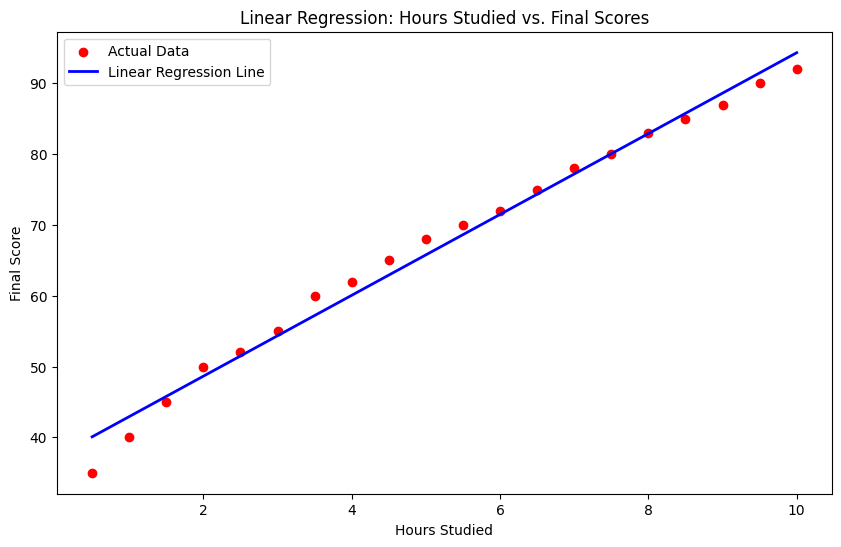

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: Hours studied vs. Final scores
hours_studied = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10]).reshape(-1, 1)
final_scores = np.array([35, 40, 45, 50, 52, 55, 60, 62, 65, 68, 70, 72, 75, 78, 80, 83, 85, 87, 90, 92])

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(hours_studied, final_scores)
predicted_scores = linear_model.predict(hours_studied)

# Scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(hours_studied, final_scores, color='red', label='Actual Data')
plt.plot(hours_studied, predicted_scores, color='blue', linewidth=2, label='Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Final Score')
plt.title('Linear Regression: Hours Studied vs. Final Scores')
plt.legend()
plt.show()


### Understanding Mean Squared Error (MSE) and R-squared in This Use Case

The simplest way to think about it is:

- **MSE** tells you the absolute magnitude of the model's prediction error. It answers:  
    *"On average, how far off are my predictions?"*

- **R-squared** tells you the relative explanatory power of the model. It answers:  
    *"How much of the real-world variation does my model actually capture?"*

Let's use an analogy. Imagine you're giving driving directions to a friend:

- **MSE** is like saying: *"My directions caused you to be, on average, 50 meters away from each turn."* This is an absolute measure of error.
- **R-squared** is like saying: *"My directions explained 98% of the variation in the route."* This tells you how well the directions accounted for the overall journey, contextualizing the error. A 50-meter error is trivial on a 100km journey (high R²) but a disaster on a 500m journey (low R²).

In the context of our linear regression model (predicting final scores from hours studied), MSE quantifies the average squared difference between the actual scores (`final_scores`) and the predicted scores (`predicted_scores`). R-squared tells us how much of the variation in students' final scores can be explained by the number of hours they studied.

#### Summary of Key Differences

| Feature | Mean Squared Error (MSE) | R-squared (R²) |
| :--- | :--- | :--- |
| **Main Purpose** | Measures the average magnitude of prediction error. | Measures the proportion of variance explained by the model. |
| **Scale** | In **squared units** of the target variable (e.g., dollars², kg²). | **Unitless** (a ratio or percentage from 0 to 1). |
| **Interpretation** | Absolute measure of error. Lacks context without knowing the scale of the data. | Relative measure of fit. Provides context automatically. |
| **"Good" Value** | As close to **0** as possible. | As close to **1** as possible. |

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(final_scores, predicted_scores)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r2 = r2_score(final_scores, predicted_scores)
print(f"R-squared: {r2:.4f}")

# Interpretation
print("\nInterpretation:")
print(f"- The MSE of {mse:.2f} indicates the average squared difference between the actual and predicted scores.")
print(f"- The R-squared value of {r2:.4f} shows that the model explains {r2*100:.2f}% of the variance in final scores based on hours studied.")

Mean Squared Error (MSE): 3.62
R-squared: 0.9868

Interpretation:
- The MSE of 3.62 indicates the average squared difference between the actual and predicted scores.
- The R-squared value of 0.9868 shows that the model explains 98.68% of the variance in final scores based on hours studied.


---

## 1. From Linear to Logistic Regression

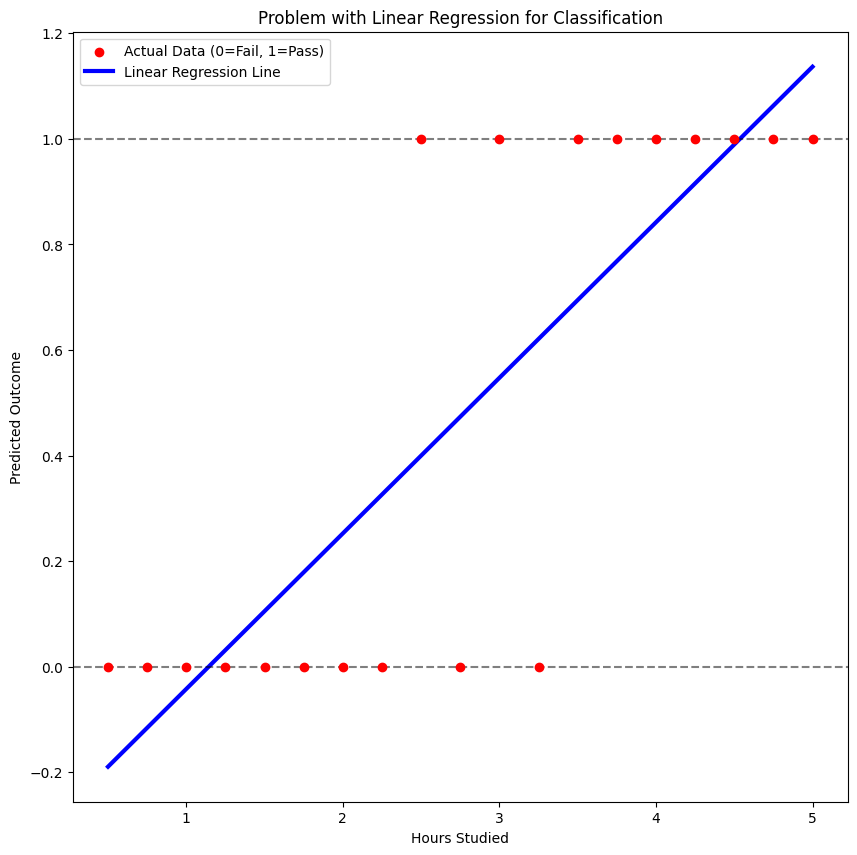

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: Hours studied vs. Pass/Fail
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(hours_studied, pass_fail)
line = linear_model.predict(hours_studied)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data (0=Fail, 1=Pass)')
plt.plot(hours_studied, line, color='blue', linewidth=3, label='Linear Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Predicted Outcome')
plt.title('Problem with Linear Regression for Classification')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axhline(y=1, color='k', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

## Introduction to Logistic Regression

**Logistic Regression** is a statistical method used for binary classification problems—where the goal is to assign each input to one of two possible categories. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that an input belongs to a particular class.

### The Logistic (Sigmoid) Function

At the heart of logistic regression is the **logistic function**, also known as the **sigmoid function**. This function takes any real-valued number and maps it to a value between 0 and 1, making it ideal for modeling probabilities.

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

where $z$ is the output of a linear equation:

$$
z = w_0 + w_1 x
$$

- $w_0$ is the intercept (bias)
- $w_1$ is the coefficient (weight)
- $x$ is the input feature (e.g., hours studied)

### From Probability to Classification

The output of the sigmoid function, $\sigma(z)$, represents the probability that the input belongs to the positive class (e.g., "Pass"). To make a final decision, we use a threshold—commonly 0.5:

- If $\sigma(z) \geq 0.5$, classify as **Pass** (1)
- If $\sigma(z) < 0.5$, classify as **Fail** (0)

### Application: Predicting Pass/Fail from Study Hours

In our example, we use logistic regression to predict whether a student will **pass** or **fail** based on the number of hours they studied. The model learns the relationship between study hours and exam outcomes, and then uses the sigmoid function to estimate the probability of passing. By applying the threshold, we can automatically classify each student as passing or failing.

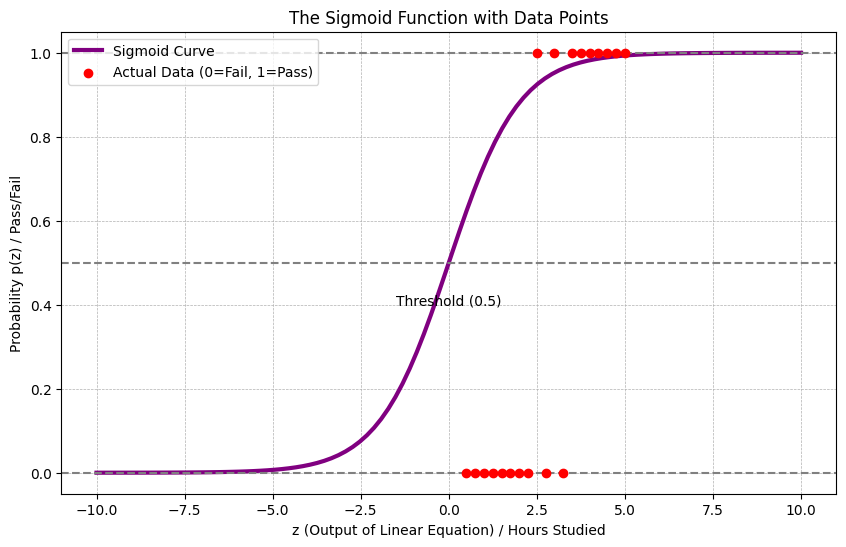

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Data for hours studied and pass/fail
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5])
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, p, color='purple', linewidth=3, label='Sigmoid Curve')
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data (0=Fail, 1=Pass)')
plt.xlabel('z (Output of Linear Equation) / Hours Studied')
plt.ylabel('Probability p(z) / Pass/Fail')
plt.title('The Sigmoid Function with Data Points')
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axhline(y=0, color='grey', linestyle='--')
plt.axhline(y=1, color='grey', linestyle='--')
plt.text(0, 0.4, 'Threshold (0.5)', ha='center')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

No matter what the input ($z$) is, the output (the probability) is always between 0 and 1. This S-curve is what the model learns to fit to our data.


---

## 2. An Introduction to Statistical Classification

So, what exactly is **classification**? It's the process of taking an input and assigning it to a specific category or **class**.

Think of it as sorting. You're given a piece of fruit and you have to decide if it's an 'Apple', 'Banana', or 'Orange'. In machine learning, we build a model, called a **classifier**, to do this sorting for us automatically.

### Key Terminology
 - **Classifier**: The algorithm or model that performs the classification (e.g., Logistic Regression).
 - **Features**: The input variables used to make the decision. For our fruit example, features could be `color`, `shape`, and `weight`.
 - **Classes** (or Labels): The categories we are trying to predict (e.g., 'Apple', 'Banana', 'Orange').
 - **Decision Boundary**: An imaginary line or surface that separates the different classes. The classifier learns this boundary from the data.

Let's visualize a simple decision boundary. Imagine we want to classify dots into two groups, blue and yellow, based on their x and y coordinates.

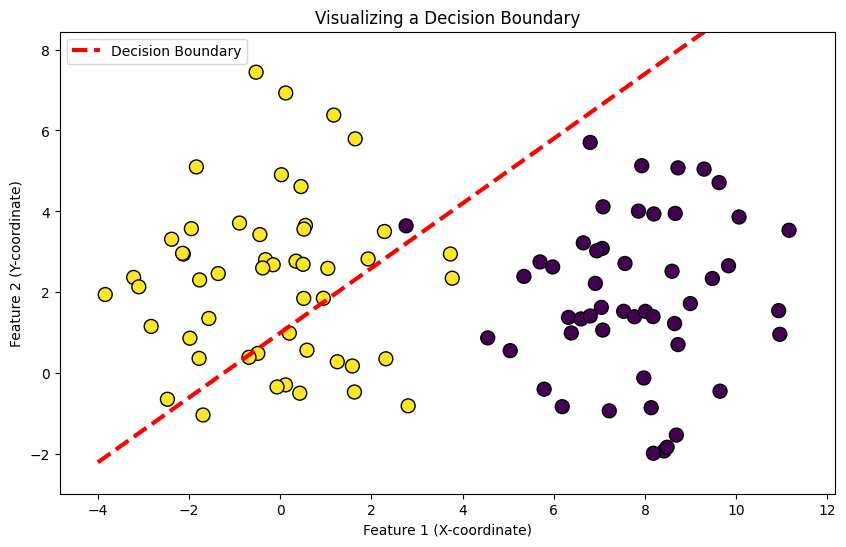

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate simple, linearly separable data
X, y = make_blobs(n_samples=100, centers=[(8, 2), (0, 2)], n_features=2, random_state=42, cluster_std=2)

# A simple decision boundary (we can just draw a line for this example)
x_decision = np.linspace(-4, 12, 100)
y_decision = 0.8 * x_decision + 1 # A manually chosen line for illustration

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.plot(x_decision, y_decision, color='red', linestyle='--', linewidth=3, label='Decision Boundary')
plt.xlabel('Feature 1 (X-coordinate)')
plt.ylabel('Feature 2 (Y-coordinate)')
plt.title('Visualizing a Decision Boundary')
plt.legend()
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.show()

In the plot above, the classifier's job is to find the best possible red dashed line to separate the purple dots from the yellow dots. Any new dot that falls on one side of the line will be classified as purple, and any dot on the other side will be classified as yellow. The machine learning algorithm's goal is to learn the optimal position for this line based on the training data.

---

## 3. Statistical Classification using Logistic Regression

Now, let's connect the two concepts. How do we get from the probabilities of Logistic Regression to a final classification like 'Pass' or 'Fail'?

### From Probability to Decision: The Threshold

We use a **decision threshold**. It's a simple rule:

> If the predicted probability from our sigmoid function is greater than or equal to a certain value (usually 0.5), we classify the sample as belonging to Class 1. Otherwise, we classify it as Class 0.

 - `p(X) >= 0.5`  ➡️  Classify as 1 (e.g., 'Pass', 'Is Obese', 'Spam')
 - `p(X) < 0.5`   ➡️  Classify as 0 (e.g., 'Fail', 'Is Not Obese', 'Not Spam')

That's it! The logistic regression model finds the best S-curve, and we use a 0.5 probability cutoff to make the final call.

### Putting It All Together in Python 🐍

Let's use our 'hours studied' vs. 'pass/fail' example and build a proper classifier with Python's most popular machine learning library, `scikit-learn`.

Let's examine a student who studied for 2.6 hours:
Probability of Failing (Class 0) vs. Passing (Class 1): [0.60846302 0.39153698]
Since 0.39 is > 0.5, the final classification is: 0 (Pass)

Model Accuracy on the training data: 89.47%


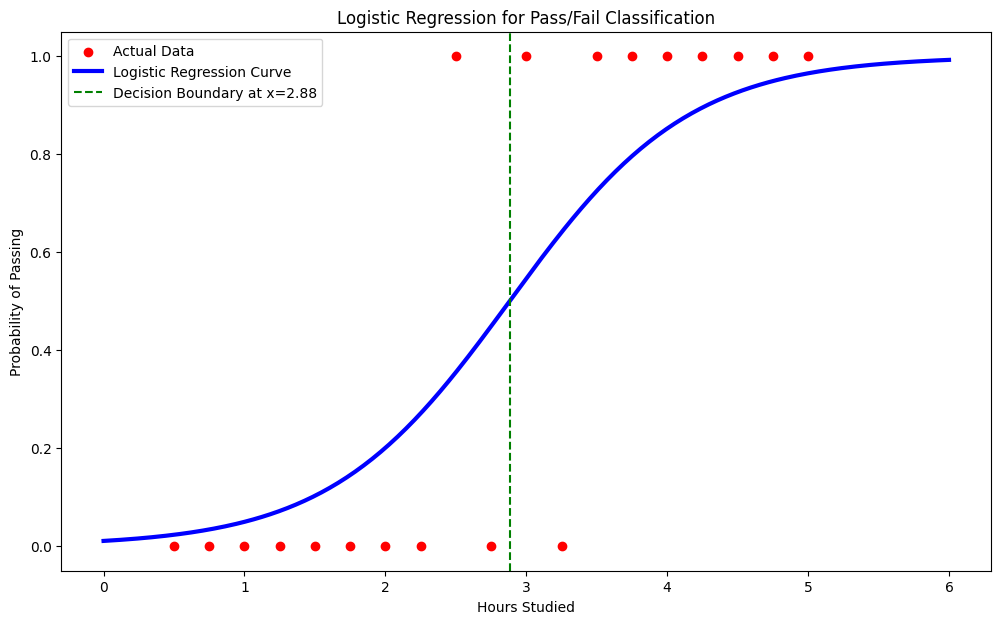

In [6]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Use the same dataset
hours_studied = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]).reshape(-1, 1)
pass_fail = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1])

# For a more robust evaluation, we should split our data, but for this simple example, we'll train and test on the same data.

# Step 3: Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(hours_studied, pass_fail)

# Step 4: Make predictions
# First, let's see the probabilities
# We will predict probabilities for the training data
# This will give us the probability of passing (class 1) for each hour studied
probabilities = log_reg.predict_proba(hours_studied)

# Then, let's see the final classifications (based on a 0.5 threshold)
# This will give us the predicted class (0 or 1) for each hour studied
predictions = log_reg.predict(hours_studied)

print("Let's examine a student who studied for 2.6 hours:")
study_time_example = np.array([[2.6]])
# Predict the probability and class for this example
# This will give us the probability of passing (class 1) for 2.6 hours studied
prob_example = log_reg.predict_proba(study_time_example)
# This will give us the predicted class (0 or 1) for 2.6 hours studied
pred_example = log_reg.predict(study_time_example)

print(f"Probability of Failing (Class 0) vs. Passing (Class 1): {prob_example[0]}")
print(f"Since {prob_example[0][1]:.2f} is > 0.5, the final classification is: {pred_example[0]} (Pass)")

# Step 5: Evaluate the model
accuracy = accuracy_score(pass_fail, predictions)
print(f"\nModel Accuracy on the training data: {accuracy * 100:.2f}%")

# Step 6: Visualize the result
plt.figure(figsize=(12, 7))
plt.scatter(hours_studied, pass_fail, color='red', zorder=20, label='Actual Data')

# Plot the sigmoid curve
x_test = np.linspace(0, 6, 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(x_test)[:, 1] # Probability of class 1
plt.plot(x_test, y_prob, color='blue', linewidth=3, label='Logistic Regression Curve')

# Plot the decision boundary
# The decision boundary is where the probability of passing is 0.5
# We can find this by solving the equation: 0.5 = 1 / (1 + exp(-(w*x + b)))
# log_reg.intercept_[0] is the bias (intercept) term of the logistic regression model.
# It represents the value of the linear model's output when all input features are zero.
# In the decision boundary equation, it helps determine where the probability crosses 0.5.
# log_reg.coef_[0][0] is the weight (coefficient) assigned to the 'hours_studied' feature by the logistic regression model.
# It represents how much the log-odds of passing change for each additional hour studied.
boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0]
plt.axvline(x=boundary, color='green', linestyle='--', label=f'Decision Boundary at x={boundary:.2f}')

plt.ylabel('Probability of Passing')
plt.xlabel('Hours Studied')
plt.title('Logistic Regression for Pass/Fail Classification')
plt.legend()
plt.show()

---

## 4. Log-Loss Function (a.k.a. Cross Entropy Loss)

### Introduction to Log-Loss (Cross Entropy Loss)

**Log-loss**, also known as **cross-entropy loss**, is the standard loss function used for evaluating the performance of classification models that output probabilities, such as logistic regression.

Log-loss measures how well the predicted probabilities match the actual class labels. It penalizes confident and incorrect predictions much more than less confident or correct ones.

#### The Formula

For a single binary classification example, the log-loss is defined as:

$$
\text{LogLoss} = -\left[ y \cdot \log(p) + (1 - y) \cdot \log(1 - p) \right]
$$

Alternatively, it can be written as a piecewise function:

$$
\text{loss}(\mathbf{w}) = 
\begin{cases}
-\log(P(y=1)), & y=1 \\
-\log(1 - P(y=1)), & y=0
\end{cases}
$$

- $y$ is the true label (0 or 1)
- $p$ is the predicted probability that $y = 1$

For a dataset with $N$ samples, the average log-loss is:

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right]
$$

#### Key Points

- If the model predicts a probability close to the true label, the loss is low.
- If the model is confident but wrong (e.g., predicts $p=0.99$ when $y=0$), the loss is very high.
- Log-loss is always non-negative, and lower values indicate better model performance.

Log-loss encourages models to output probabilities that reflect true likelihoods, not just correct classifications. This makes it especially useful for probabilistic classification tasks.

In [7]:
def log_loss(y_true, y_prob):
    """
    Compute the log-loss (cross-entropy loss) for binary classification.

    Parameters:
    y_true (np.ndarray): True binary labels (0 or 1).
    y_prob (np.ndarray): Predicted probabilities for class 1.

    Returns:
    float: Log-loss value.
    """
    # Clip probabilities to avoid log(0)
    eps = 1e-15
    y_prob = np.clip(y_prob, eps, 1 - eps)
    loss = -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))
    return loss

# Example usage with the logistic regression use case:
# y_true: pass_fail
# y_prob: probabilities of class 1 from the logistic regression model
# (Assuming 'probabilities' variable from previous logistic regression cell)
logloss_value = log_loss(pass_fail, probabilities[:, 1])
print(f"Log-loss (Cross Entropy Loss): {logloss_value:.4f}")


Log-loss (Cross Entropy Loss): 0.2754


In [8]:
print("\nInterpretation of Log-loss:")
print(f"- The log-loss value of {logloss_value:.4f} quantifies how well the predicted probabilities from our logistic regression model match the actual pass/fail outcomes.")
print("- A lower log-loss indicates that the model's predicted probabilities are close to the true labels, meaning the model is well-calibrated and confident in its correct predictions.")
print("- In this case, the log-loss is quite low, suggesting that our model is making accurate and reliable probability estimates for student outcomes.")


Interpretation of Log-loss:
- The log-loss value of 0.2754 quantifies how well the predicted probabilities from our logistic regression model match the actual pass/fail outcomes.
- A lower log-loss indicates that the model's predicted probabilities are close to the true labels, meaning the model is well-calibrated and confident in its correct predictions.
- In this case, the log-loss is quite low, suggesting that our model is making accurate and reliable probability estimates for student outcomes.


### Understanding Log-Loss (Cross-Entropy) with an Example

The core idea of **Log-Loss** is to measure how "surprised" a probabilistic model is by the correct answer. A high loss value means the model made a confident but incorrect prediction, while a low loss value means the model made a confident and correct prediction.

Let's use the formulas you provided to analyze our "hours studied vs. pass/fail" use case.

**Key Terms:**
* $y$: The actual outcome for a student (1 if Passed, 0 if Failed).
* $p$: The model's predicted probability that the student will Pass, i.e., $P(y=1)$.
* $1-p$: The model's predicted probability that the student will Fail, i.e., $P(y=0)$.

#### 1. Loss for a Single Student (The Piecewise Formula)

This is the most intuitive way to understand Log-Loss. The loss is calculated differently depending on the true outcome.

##### **Scenario A: The student actually PASSED (True Label $y = 1$)**
The formula for this case is:
> $$ \text{loss} = -\log(p) $$

* **Good Prediction:** A student studies 4.5 hours and passes ($y=1$). Our model predicts a high probability of passing, say $p = 0.95$.
    $$ \text{loss} = -\log(0.95) \approx 0.051 $$
    This is a **very low loss**. The model was confident and correct, so the penalty is small.

* **Bad Prediction:** Another student studies 1 hour but still passes ($y=1$). Our model predicts a low probability of passing, say $p = 0.10$.
    $$ \text{loss} = -\log(0.10) \approx 2.303 $$
    This is a **very high loss**. The model was confident about the wrong outcome, so it gets a large penalty.

##### **Scenario B: The student actually FAILED (True Label $y = 0$)**
The formula for this case is:
> $$ \text{loss} = -\log(1-p) $$

* **Good Prediction:** A student studies 0.5 hours and fails ($y=0$). Our model predicts a low probability of passing, $p = 0.05$. This means it predicts a high probability of *failing* ($1-p = 0.95$).
    $$ \text{loss} = -\log(1 - 0.05) = -\log(0.95) \approx 0.051 $$
    This is a **very low loss** because the model correctly predicted a high chance of failure.

* **Bad Prediction:** A student studies 3 hours but fails ($y=0$). Our model predicts a high probability of passing, $p = 0.90$.
    $$ \text{loss} = -\log(1 - 0.90) = -\log(0.10) \approx 2.303 $$
    This is another **very high loss**. The model was confident about the wrong outcome and gets penalized heavily.

#### 2. The Compact Formula (A Clever Combination)
This single formula cleverly combines both scenarios:
$$ \text{LogLoss} = -[y \cdot \log(p) + (1-y) \cdot \log(1-p)] $$
You can verify that when $y=1$, this simplifies to $-\log(p)$, and when $y=0$, it simplifies to $-\log(1-p)$. It's just a convenient way to write the piecewise function.

#### 3. Calculating the Total Loss for a Dataset
The overall model performance is the average loss across all $N$ students.
$$ \text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i)] $$

Let's calculate it for a small sample dataset:

| Hours Studied | Actual Outcome ($y$) | Model's Predicted Probability ($p$) | Individual Log-Loss Calculation | Loss |
| :--- | :--- | :--- | :--- | ---: |
| 1.0 | 0 (Fail) | 0.12 | $-\log(1 - 0.12) = -\log(0.88)$ | $0.128$ |
| 2.5 | 1 (Pass) | 0.45 | $-\log(0.45)$ | $0.799$ |
| 4.5 | 1 (Pass) | 0.96 | $-\log(0.96)$ | $0.041$ |
| 2.75 | 0 (Fail) | 0.60 | $-\log(1 - 0.60) = -\log(0.40)$ | $0.916$ |

**Total Loss Calculation:**
$$ \text{Total Loss} = 0.128 + 0.799 + 0.041 + 0.916 = 1.884 $$

**Average Log-Loss Calculation:**
$$ \text{Average Log-Loss} = \frac{\text{Total Loss}}{N} = \frac{1.884}{4} = 0.471 $$

The goal of training a logistic regression model is to adjust its internal parameters to make this final average Log-Loss value as low as possible.

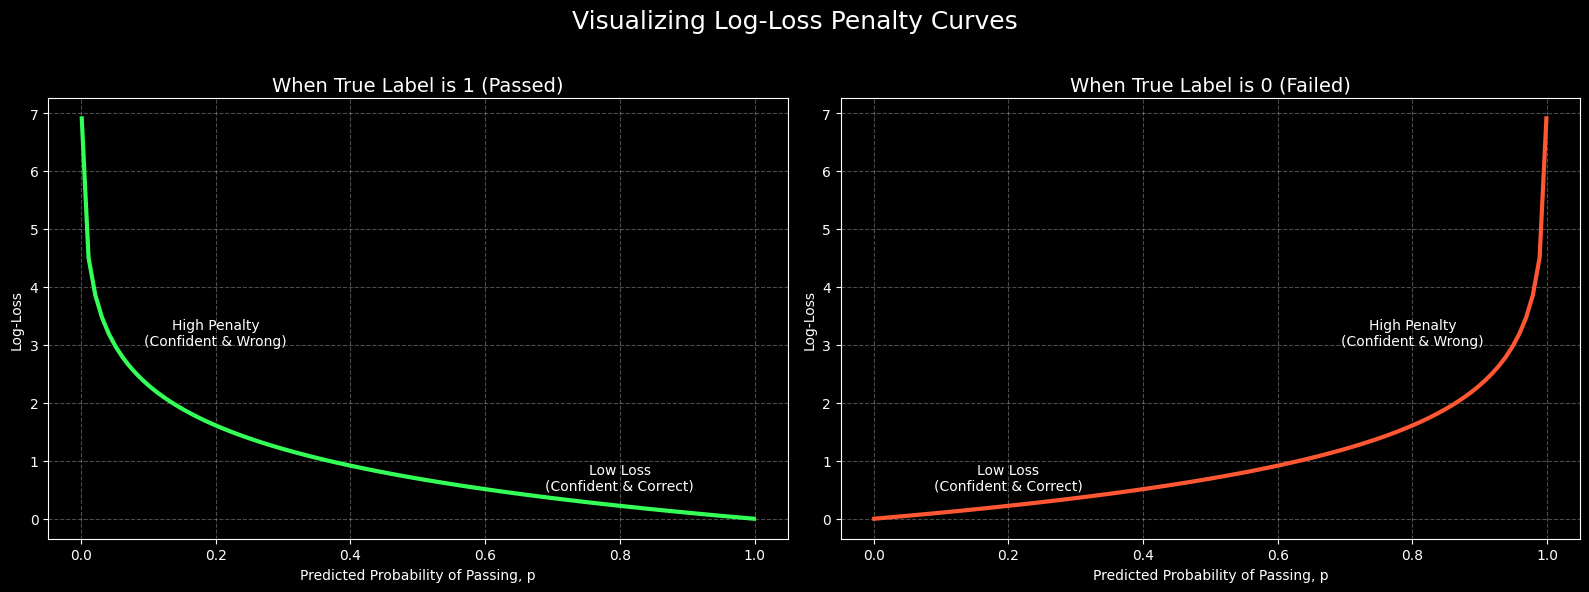

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of predicted probabilities from 0.001 to 0.999
# We avoid 0 and 1 because log(0) is undefined.
p = np.linspace(0.001, 0.999, 100)

# Calculate the loss for each case
# Case 1: The true label is 1 (e.g., student Passed)
loss_for_y1 = -np.log(p)
# Case 2: The true label is 0 (e.g., student Failed)
loss_for_y0 = -np.log(1 - p)

# Create the plot
plt.style.use('dark_background') # Using dark style to match your screenshot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizing Log-Loss Penalty Curves', fontsize=18, color='white')

# Plot for y=1
ax1.plot(p, loss_for_y1, color='#33FF57', lw=3)
ax1.set_title('When True Label is 1 (Passed)', color='white', fontsize=14)
ax1.set_xlabel('Predicted Probability of Passing, p', color='white')
ax1.set_ylabel('Log-Loss', color='white')
ax1.tick_params(colors='white')
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.text(0.8, 0.5, 'Low Loss\n(Confident & Correct)', ha='center', color='white')
ax1.text(0.2, 3.0, 'High Penalty\n(Confident & Wrong)', ha='center', color='white')


# Plot for y=0
ax2.plot(p, loss_for_y0, color='#FF5733', lw=3)
ax2.set_title('When True Label is 0 (Failed)', color='white', fontsize=14)
ax2.set_xlabel('Predicted Probability of Passing, p', color='white')
ax2.set_ylabel('Log-Loss', color='white')
ax2.tick_params(colors='white')
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.text(0.2, 0.5, 'Low Loss\n(Confident & Correct)', ha='center', color='white')
ax2.text(0.8, 3.0, 'High Penalty\n(Confident & Wrong)', ha='center', color='white')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Summary

We have walked through a complete, end-to-end machine learning workflow.

1.  **We understood the theory**: We learned that Logistic Regression uses the Sigmoid function to model the probability of a binary outcome.
2.  **We defined the task**: We framed our problem as a Statistical Classification task—sorting students into 'Pass' or 'Fail'.
3.  **We implemented the solution**: We used `scikit-learn` to train a model that learned the relationship between study hours and exam outcomes. This model learned the best S-curve to fit the data.
4.  **We made predictions**: We saw how the model outputs a continuous probability, and how applying a 0.5 decision threshold turns that probability into a discrete classification.

This fundamental process of **modeling probability** and then **using a threshold to classify** is a cornerstone of many advanced machine learning techniques.

---

## 🎯 IN-CLASS ACTIVITY

| Strategy | Description | How It Adapts to LLMs |
| :--- | :--- | :--- |
| **Pair Programming** | Pairs switch roles between coder and reviewer, or “driver” and “navigator.” | Even if using LLMs, students must *discuss* and *justify* choices—builds teamwork and accountability. |

---

1.  Study the algorithm to implement the Statistical Classification Log-Loss (a.k.a., Cross Entropy). Take the `#hours` studied vs. pass-fail use case as an example. Document the algorithm and functions in a Jupyter Notebook using markdown and code cells.

2.  Commit and push your solution to your GitHub.

3.  Prepare three talking points about the most important sections of your code.

> ### When you are ready:

| You | Your Peer |
| :--- | :--- |
| **4a.** Clone your peer's code, review it, and ask questions about the code. | **4b.** Will clone your code, review it, and ask questions about it. |

<br>

5.  Present both your notes and reflections **as pairs**. Here are the instructions:

6.  Team A (you). Prepare at least three(3) talking points and add them to your Jupyter Notebook.

7.  Commit and push all the changes to your remote Git.

8.  When you are ready, meet with Team B (Your Peer), then present, explain, show them your talking points and code.

9.  Team B (Your Peer) will take notes and write insights about your talking points, use case, and code.

10. Switch roles with Team B (Your Peer) and repeat steps 6 to 9.

11. Prepare a report with the workshop title, your name(s), a l6ink to your repo, and a link to your peer's repo.

12. Submit the report as per the instructions provided by your instructor.

# Log-Loss (Cross Entropy) in Binary Classification
## Use Case: Gym Membership Renewal Prediction

## Study Objective

This notebook focuses on studying Log-Loss (Cross Entropy) as the key mechanism behind statistical classification.

This extends the instructor's "hours studied vs pass/fail" example into a real-world scenario.

Following the same classification logic, we apply the algorithm to predicting gym membership renewal.

The goal is not only to make predictions, but to understand how Log-Loss evaluates probability quality in classification.



Instead of predicting whether a student will pass based on study hours,  
we now predict whether a gym member will renew their membership based on how often they visit the gym each week.

This is a binary classification problem:

- 0 = Will NOT Renew
- 1 = Will Renew

We will follow the same machine learning workflow:

1. Model probability using Logistic Regression
2. Convert probability into decision using a threshold
3. Evaluate prediction reliability using Log-Loss



### Talking Point 1 — Role of Logistic Regression

Logistic regression is used to model probabilities in classification tasks.  
Unlike linear regression, which predicts continuous values, classification requires probabilities between 0 and 1.

Logistic regression enables this by applying the sigmoid function, which transforms predictions into probability estimates that can later be evaluated using Log-Loss.


---

### Talking Point 2 — From Probability to Decision and Evaluation

The model does not directly output Yes or No.  
Instead, logistic regression predicts probabilities.

A threshold (typically 0.5) converts probability into a classification decision.

However, Log-Loss goes further by evaluating how confident and accurate those probability predictions are, rather than only checking correctness.


---

### Talking Point 3 — Importance of Log-Loss in Real Applications

In real-world scenarios such as gym membership renewal prediction, Log-Loss helps evaluate how reliable probability predictions are.

This demonstrates that machine learning is not only about making decisions, but also about measuring prediction confidence, which is essential for business strategy and risk assessment.



### We replaced the study-hours example with gym attendance to show how Logistic Regression can be applied to real-world customer retention problems.

In [10]:
## Step 1 — Generate Synthetic Data
import numpy as np

# Weekly gym visits (feature)
# Represents how many times a member visits the gym per week
weekly_visits = np.array([
    0, 0.5, 1, 1.5, 2, 2.5, 3,
    3.5, 4, 4.5, 5, 5.5, 6
]).reshape(-1, 1)

# Membership renewal outcome (label)
# 0 = will not renew
# 1 = will renew
renew = np.array([
    0, 0, 0, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1
])


In [11]:
## Step 2 — Train Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Create logistic regression model
model = LogisticRegression()

# Train model using weekly visits as input and renewal as output
model.fit(weekly_visits, renew)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
## Step 3 — Predict Probabilities

# Predict probability of renewal
# Output format: [P(not renew), P(renew)]
probabilities = model.predict_proba(weekly_visits)

# Predict final classification (0 or 1)
predictions = model.predict(weekly_visits)


In [13]:
##S tep 4 — Example Prediction

# Example: a member who visits 2.8 times per week
example = np.array([[2.8]])

# Predict renewal probability
prob_example = model.predict_proba(example)

# Predict classification using 0.5 threshold
pred_example = model.predict(example)

print("Probability [Not Renew, Renew]:", prob_example[0])
print("Final Prediction:", pred_example[0])


Probability [Not Renew, Renew]: [0.48137702 0.51862298]
Final Prediction: 1


In [14]:
## Step 5 — Decision Boundary

# Calculate decision boundary
# This tells us how many visits per week are needed to likely renew
boundary = -model.intercept_[0] / model.coef_[0][0]

print("Decision Boundary (Weekly Visits):", boundary)


Decision Boundary (Weekly Visits): 2.742461847108656


In [15]:
## Step 6 — Log-Loss Function


def log_loss(y_true, y_prob):
    """
    Compute Log-Loss for binary classification
    """
    eps = 1e-15  # avoid log(0)
    y_prob = np.clip(y_prob, eps, 1 - eps)
    return -np.mean(y_true*np.log(y_prob) + (1-y_true)*np.log(1-y_prob))

# Calculate log-loss using renewal probability
loss = log_loss(renew, probabilities[:,1])

print("Log-Loss:", loss)


Log-Loss: 0.23948048933238633


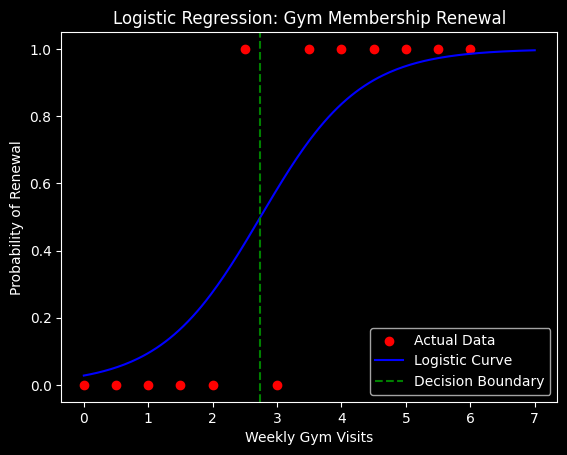

In [16]:
## Step 7 — Visualization

import matplotlib.pyplot as plt

# Generate smooth values for plotting sigmoid curve
x_test = np.linspace(0, 7, 200).reshape(-1,1)
y_prob = model.predict_proba(x_test)[:,1]

plt.scatter(weekly_visits, renew, color='red', label="Actual Data")
plt.plot(x_test, y_prob, color='blue', label="Logistic Curve")

# Plot decision boundary
plt.axvline(x=boundary, color='green', linestyle='--', label="Decision Boundary")

plt.xlabel("Weekly Gym Visits")
plt.ylabel("Probability of Renewal")
plt.title("Logistic Regression: Gym Membership Renewal")
plt.legend()
plt.show()


## Case Analysis

From the visualization, we observe a clear relationship between weekly gym visits and membership renewal.

The logistic curve shows that as the number of weekly visits increases, the probability of renewal also increases.

The decision boundary is approximately:

**2.74 visits per week**

This indicates the point where the model predicts an equal likelihood of renewal or cancellation.

Beyond decision-making, Log-Loss provides deeper insight into prediction quality.

The relatively low Log-Loss value suggests that the predicted probabilities closely match actual outcomes.

This demonstrates that the model is not only making correct classifications, but is also assigning appropriate confidence levels to its predictions.

In this context, Log-Loss helps evaluate how reliable the probability estimates are, which is essential for real-world classification tasks.


### Reflection

Through this example, we demonstrated how Log-Loss helps evaluate prediction quality in classification tasks.

Instead of focusing only on whether predictions are correct, Log-Loss measures how confident those predictions are.

This shows that:

- Logistic Regression models probability
- A threshold converts probability into decision
- Log-Loss evaluates prediction reliability



## Peer Insights

After reviewing our peer team6's implementation, we observed several important insights:

• Their use case demonstrated how statistical classification can be applied to real-world datasets, such as predicting whether a track is explicit based on popularity, duration, and genre.

• Their notebook highlighted that logistic regression is not only used to make classification decisions, but also to generate probability estimates that support more informed evaluation.

• Most importantly, their implementation reinforced the role of Log-Loss in measuring prediction reliability. Instead of focusing solely on correct or incorrect classifications, Log-Loss evaluates how confident the model's predictions are.

This strengthened our understanding that classification models are trained to optimize probability accuracy, not just decision accuracy.


## peer's Talking Points

### Talking Point 1 — Classification framing
We convert a real dataset into a **probabilistic binary classification** problem:
- Inputs: popularity, duration, genre
- Output: probability of being explicit
- Decision threshold transforms probability → final class label

### Talking Point 2 — Why logistic regression is the right “Week 6” tool
Logistic regression is interpretable:
- It models **log-odds (logit)** as a linear function of features
- It produces probabilities (not just labels)
- It draws a clean decision boundary and supports threshold tuning

### Talking Point 3 — Why log-loss matters more than accuracy here
Because the dataset is imbalanced (~19% explicit):
- Accuracy can look “good” by predicting mostly 0
- **Log-loss** rewards calibrated probabilities and punishes confident wrong predictions
- ROC-AUC evaluates ranking quality across thresholds